In [1]:
import pandas as pdf
import quandl

df = quandl.get("WIKI/GOOGL")

In [2]:
print(df.columns.values)
print(df.head())

[u'Open' u'High' u'Low' u'Close' u'Volume' u'Ex-Dividend' u'Split Ratio'
 u'Adj. Open' u'Adj. High' u'Adj. Low' u'Adj. Close' u'Adj. Volume']
              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869

In [3]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',
         'Adj. Close', 'Adj. Volume']]
        
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df['HL_PCT'] = (df['Adj. Open'] - df['Adj. High']) / df['Adj. Close'] * 100.0

In [5]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [6]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,-4.036478,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,-7.450836,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,-2.486289,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,-0.343282,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,-3.056604,1.183658


In [7]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]

In [8]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,-4.036478,0.324968,44659000.0
2004-08-20,54.322689,-7.450836,7.227007,22834300.0
2004-08-23,54.869377,-2.486289,-1.227880,18256100.0
2004-08-24,52.597363,-0.343282,-5.726357,15247300.0
2004-08-25,53.164113,-3.056604,1.183658,9188600.0


In [9]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import math

forecast_col = 'Adj. Close'
df.fillna(value=-999999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [10]:
# 가상의 레이블을 만들기 위해서 df row를 역방향으로 일정 간격으로 shift
df['label'] = df[forecast_col].shift(-forecast_out)

In [11]:
# shift로 이동해 NA 로 채워진 label의 row를 삭제
df = df.dropna()

In [12]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,-4.036478,0.324968,44659000.0,67.739104
2004-08-20,54.322689,-7.450836,7.227007,22834300.0,69.399229
2004-08-23,54.869377,-2.486289,-1.227880,18256100.0,68.752232
2004-08-24,52.597363,-0.343282,-5.726357,15247300.0,69.639972
2004-08-25,53.164113,-3.056604,1.183658,9188600.0,69.078238


In [13]:
import numpy as np

X = np.array(df.drop(['label'], axis=1))
X = preprocessing.scale(X)
print(len(X))
y = np.array(df['label'])
print(len(y))

3053
3053


In [14]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2137
916
2137
916


In [15]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.96856050218


In [16]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

('linear', 0.96827882508306651)
('poly', 0.70225687927419822)
('rbf', 0.79617954033251437)
('sigmoid', 0.88669288948735581)


In [17]:
X_lately = X[-forecast_out:]
print(len(X_lately))

31


In [18]:
forecast_set = clf.predict(X_lately)
print(forecast_set, confidence, forecast_out)
df['Forecast'] = np.nan
df.head()

(array([ 677.58353788,  668.21661519,  658.06903387,  665.98354968,
        678.95693891,  696.16120322,  696.86581934,  688.06184209,
        676.99187079,  670.64745663,  683.54842538,  683.69891924,
        686.93151579,  680.3893635 ,  645.98813919,  655.37899667,
        658.35466857,  697.03361212,  672.36959847,  666.43709941,
        664.57969816,  683.42500442,  700.08135846,  705.87348289,
        685.3978536 ,  646.52864323,  691.4563011 ,  705.48462075,
        688.88756666,  693.89117179,  669.36325221]), 0.88669288948735581, 31)


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,-4.036478,0.324968,44659000.0,67.739104,NaN
2004-08-20,54.322689,-7.450836,7.227007,22834300.0,69.399229,NaN
2004-08-23,54.869377,-2.486289,-1.227880,18256100.0,68.752232,NaN
2004-08-24,52.597363,-0.343282,-5.726357,15247300.0,69.639972,NaN
2004-08-25,53.164113,-3.056604,1.183658,9188600.0,69.078238,NaN


In [19]:
import datetime

last_date = df.iloc[-1].name
last_unix = pdf.to_datetime(last_date).value 
print(type(last_unix))
print(last_unix)
one_day = 86400 * 1000000000
next_unix = last_unix + one_day
print(next_unix)
print(pdf.to_datetime(last_unix, format="%Y-%m-%d"))
print(pdf.to_datetime(next_unix, format="%Y-%m-%d"))


<type 'int'>
1475452800000000000
1475539200000000000
2016-10-03 00:00:00
2016-10-04 00:00:00


2016-11-04 00:00:00


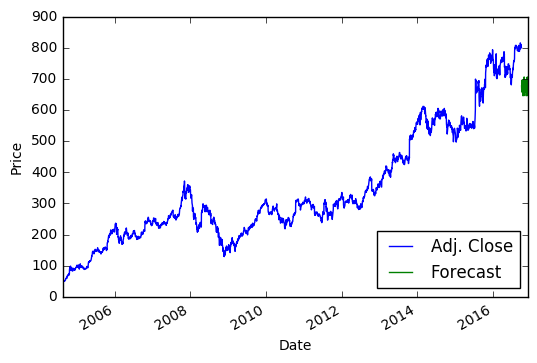

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19   50.322842 -4.036478    0.324968   44659000.0  67.739104       NaN
2004-08-20   54.322689 -7.450836    7.227007   22834300.0  69.399229       NaN
2004-08-23   54.869377 -2.486289   -1.227880   18256100.0  68.752232       NaN
2004-08-24   52.597363 -0.343282   -5.726357   15247300.0  69.639972       NaN
2004-08-25   53.164113 -3.056604    1.183658    9188600.0  69.078238       NaN
            Adj. Close  HL_PCT  PCT_change  Adj. Volume  label    Forecast
Date                                                                      
2016-11-30         NaN     NaN         NaN          NaN    NaN  691.456301
2016-12-01         NaN     NaN         NaN          NaN    NaN  705.484621
2016-12-02         NaN     NaN         NaN          NaN    NaN  688.887567
2016-12-03         NaN     NaN         NaN          NaN    NaN  693.8911

Date
2016-11-30    691.456301
2016-12-01    705.484621
2016-12-02    688.887567
2016-12-03    693.891172
2016-12-04    669.363252
Name: Forecast, dtype: float64

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

print(pdf.to_datetime(next_unix, format="%Y-%m-%d"))
for i in forecast_set:
    next_date = pdf.to_datetime(next_unix, format="%Y-%m-%d")
    next_unix += 86400 * 1000000000
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

print(df.head())
print(df.tail())
test = df['Forecast']
test.tail()
